In [1]:
import numpy as np
from numpy import linspace, ndarray,cov
import pandas as pd
from pandas import Series, DataFrame

import scipy
from scipy import stats, optimize
from scipy.stats import kurtosis, skew, norm
from scipy.stats.kde import gaussian_kde
from scipy.optimize import curve_fit

import pwlf

import seaborn as sb

import dc_stat_think as dcst

from matplotlib import pyplot as plt

import statsmodels
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
address = r'exportmc.csv'

p = pd.read_csv(address)
p.columns = ['k7','k8']
#p.columns = ['x','v']

head = p.head(6)
print(head)

a = ['k7','k8']

pv = p[a]

pp = p.k7

print(pv)
print(pp)

          k7         k8
0  17.402617  11.536782
1  15.633147  10.782971
2  17.692430  10.856737
3  16.149050   9.884377
4  15.740754  13.450618
5  14.365423   9.818110
            k7         k8
0    17.402617  11.536782
1    15.633147  10.782971
2    17.692430  10.856737
3    16.149050   9.884377
4    15.740754  13.450618
..         ...        ...
995  16.778541  10.969624
996  16.053320  11.631006
997  15.143639  14.131023
998  17.143873   9.138698
999  16.627936  11.440354

[1000 rows x 2 columns]
0      17.402617
1      15.633147
2      17.692430
3      16.149050
4      15.740754
         ...    
995    16.778541
996    16.053320
997    15.143639
998    17.143873
999    16.627936
Name: k7, Length: 1000, dtype: float64


In [ ]:
########################
### Statistical Analysis
########################

In [3]:
maxp = pv.max()
minp = pv.min()

# First Four moments Calculation
mean = pv.mean()
var = pv.var()
skew = pv.skew()
kurt = pv.kurt()
# covar = np.cov(wind_speed,wind_speed2)

print(var)
print(skew)
print(kurt)

# Printing first Four moments Calculation
#print('Maximum Value: %0.5f' % maxp)
#print('Minimum Value: %0.5f' % minp)
#print('First 4 Moments:')
#print('Mean/Expected Value: %0.5f' % mean)
#print('Variance: %0.5f' % var)
#print('Skewness: %0.5f' % skew)
#print('Kurtosis: %0.5f' % kurt)
#print(covar)

k7    2.727530
k8    2.470401
dtype: float64
k7   -0.865585
k8    0.716910
dtype: float64
k7    0.979497
k8    0.206246
dtype: float64


In [4]:
p7 = p.k7
p8 = p.k8

covar = np.cov(p7,p8)

print(covar)

[[ 2.72753014 -0.01489189]
 [-0.01489189  2.47040096]]


In [5]:
cor78 = np.corrcoef(p7,p8)
print(cor78)

[[ 1.         -0.00573695]
 [-0.00573695  1.        ]]


In [6]:
test= sum((p7[:]-mean[0])*(p8[:]-mean[1])*(1/1000))
test

-0.014877000383937217

In [7]:
test1= sum((p7[:]-mean[0])**2*(1/1000))
test2= sum((p8[:]-mean[1])**2*(1/1000))
print(test1)
print(test2)

2.724802612967649
2.467930557642143


In [8]:
test3= sum(((p7[:]-mean[0])**3)*(1/1000))/(var[0]**(3/2))
print(skew)
test3

k7   -0.865585
k8    0.716910
dtype: float64


-0.8629898362197712

In [9]:
test4= sum(((p7[:]-mean[0])**4)*(1/1000))/(var[0]**(4/2))
print(kurt[0])
test4

0.9794970770524225


3.9606791809999735

In [10]:
test5= sum(((p7[:]-mean[0])**3)*(1/1000))
test6 = (skew[0])*(var[0]**(3/2))
print(test5)
print(test6)

-3.8874070610408813
-3.8990965525052905


In [11]:
test7= sum(((p7[:]-mean[0])**4)*(1/1000))
test8 = (kurt[0] + 3)*(var[0]**(4/2))
print(test7)
print(test8)

29.465158612225835
29.605152857302205


In [12]:
test11 = (var[0]**(1/2) )
test12 = (var[1]**(1/2) )
print(test11)
print(test12)

1.6515235823659193
1.5717509212978826


In [13]:
test9 = sum((p7[:]*p8[:])*(1/1000))
test10 = ( sum((p7[:]*p8[:])*(1/1000)) - (mean[0]*mean[1]) ) / ((var[0]**(1/2))*(var[1]**(1/2)))
print(test9)
print(test10)

176.06410254688785
-0.005731217248380725


In [14]:
test10 = ( sum((p7[:]*p8[:])*(1/1000)) - (mean[0]*mean[1]) )
print(test10)

-0.014877000384018402


In [15]:
test13 = (mean[0]*mean[1])
print(test13)

176.07897954727187


In [16]:
i=1
for x in a:
    print('MM(\'i%d\',\'m1\')= %0.7f ;' %(i,mean[x]))
    print('MM(\'i%d\',\'m2\')= %0.7f ;' %(i,var[x]))
    print('MM(\'i%d\',\'m3\')= %0.7f*rpower(MM(\'i%d\',\'m2\'),1.5) ;' %(i,skew[x],i))
    print('MM(\'i%d\',\'m4\')= (%0.7f+3)*rpower(MM(\'i%d\',\'m2\'),1.5) ;' %(i,kurt[x],i))
    i = i + 1
    

MM('i1','m1')= 15.9376700 ;
MM('i1','m2')= 2.7275301 ;
MM('i1','m3')= -0.8655849*rpower(MM('i1','m2'),1.5) ;
MM('i1','m4')= (0.9794971+3)*rpower(MM('i1','m2'),1.5) ;
MM('i2','m1')= 11.0479750 ;
MM('i2','m2')= 2.4704010 ;
MM('i2','m3')= 0.7169101*rpower(MM('i2','m2'),1.5) ;
MM('i2','m4')= (0.2062456+3)*rpower(MM('i2','m2'),1.5) ;


In [ ]:
########################
### Trivial Histograms
########################

In [17]:
def plothist(p,x):
    plt.xlabel('Yield', size = 14)
    plt.ylabel('Freequency', size = 14)
    txt = 'Process {}'.format(x)
    plt.title(txt, size = 14)
    plt.hist(p,bins='auto',color = 'gray',rwidth=150)

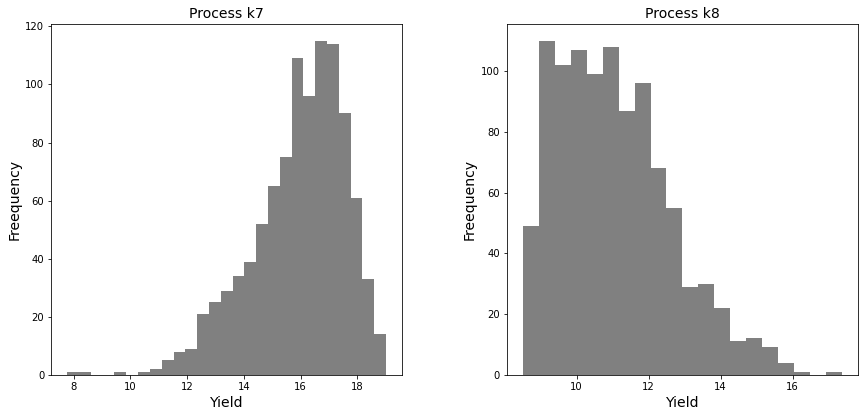

In [18]:
plt.rcParams["figure.figsize"] = (14,14)

ii = 1
for x in ['k7','k8']:
    plt.subplot(2, 2,ii)
    a = x
    p = pv[x]
    plothist(p,x)
    ii = ii + 1
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)
    
plt.show()

In [19]:
def plotkde(x):
    p1 = pv[x]
    mean1 = mean[x]
    var1 = var[x]
    skew1 = skew[x]
    kurt1 = kurt[x] 
    kde = gaussian_kde(p1)
    dist_space = linspace( min(p1), max(p1), 300 )
    plt.plot( dist_space, kde(dist_space), color = 'gray' )
    txt = 'Process {}'.format(x)
    plt.xlabel('Yield constant', size = 11)
    plt.ylabel('Density', size = 11)
    plt.title(txt, size = 11)
    plt.annotate('Mean = %0.3f'% mean1,(9,0.20))
    plt.annotate('Variance = %0.3f'% var1,(9,0.18))
    plt.annotate('Skewness = %0.3f'% skew1,(9,0.16))
    plt.annotate('Kurtosis = %0.3f'% kurt1,(9,0.14))
    plt.hist(p1, bins=10, density=True, color='salmon')
    plt.show
    

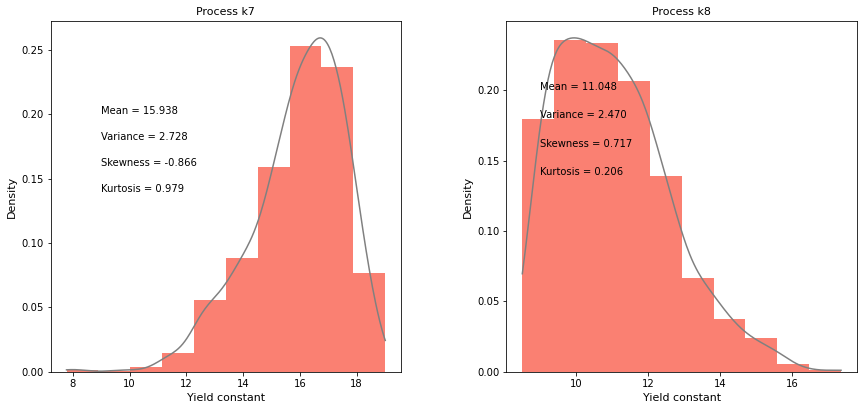

In [20]:
plt.rcParams["figure.figsize"] = (14,14)

ii = 1
for x in ['k7','k8']:
    plt.subplot(2,2,ii)
    plotkde(x)
    ii = ii + 1
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)
    
plt.show()

In [ ]:
########################
###       ECDF
########################

In [22]:
pk7 = pv['k7']
pk8 = pv['k8']

ecdfk7 = ECDF(pk7)
ecdfk7x = pd.DataFrame(ecdfk7.x)
ecdfk7y = pd.DataFrame(ecdfk7.y)

ecdfk8 = ECDF(pk8)
ecdfk8x = pd.DataFrame(ecdfk8.x)
ecdfk8y = pd.DataFrame(ecdfk8.y)


In [23]:
address1 = r"ecdf-data.xlsx"

for x in ['k7','k8']:
    address1 = r"ecdf-data{}.xlsx".format(x)
    p1 = pv[x]
    ecdfk = ECDF(p1)
    ecdfkx = pd.DataFrame(ecdfk.x)
    ecdfky = pd.DataFrame(ecdfk.y)
    txtx = 'ecdf{}x'.format(x)
    txty = 'ecdf{}y'.format(x)
    with pd.ExcelWriter(address1) as writer:  
        ecdfkx.to_excel(writer, sheet_name=txtx)
        ecdfky.to_excel(writer, sheet_name=txty)
    

In [ ]:
########################
### Simplified GLF
########################

In [32]:
xe = ecdfk7x.to_numpy()
ye = ecdfk7y.to_numpy()

xef = np.delete(xe, [0])
yef = np.delete(ye, [0])

[59.32964915  1.79238162  2.93850822]


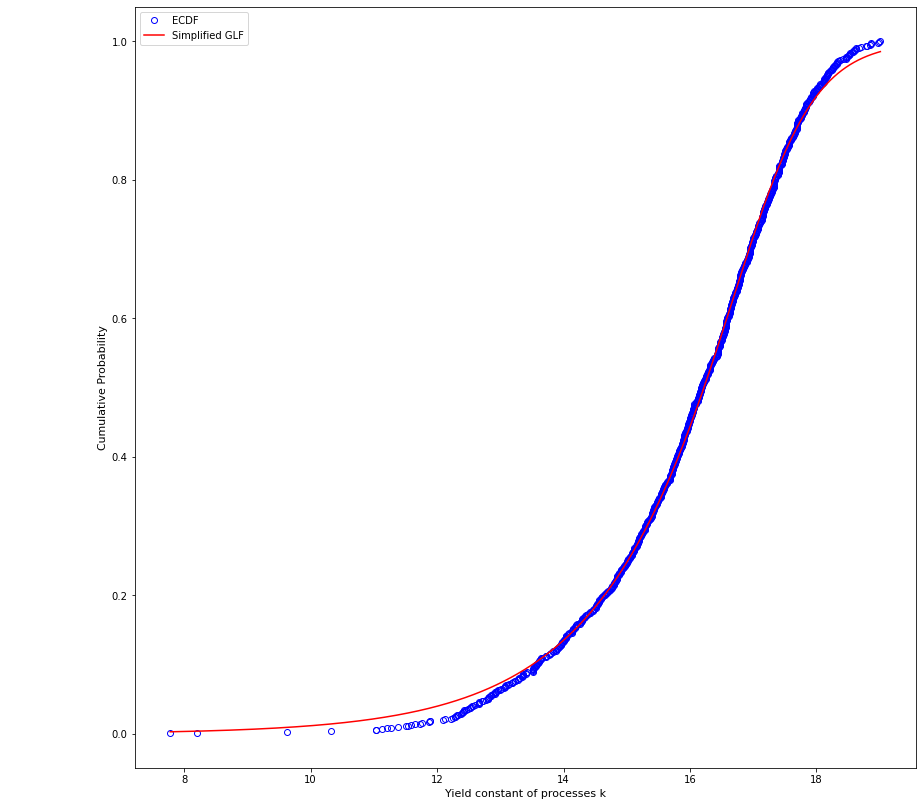

In [33]:
# define the true objective function
def objective(x, b2, b3, b4):
    return 1/((1+b2*(np.exp(-b3*(x-15))))**(1/b4))
#    return ((1+b2*(np.exp(-b3*x)))**(1/b4))**(-1)


popt, pcov = curve_fit(objective, xef, yef, maxfev = 10000)            
print(popt)
              
# summarize the parameter values
b2, b3, b4 = popt
x_line = np.arange(min(xef), max(xef),0.001)
# calculate the output for the range
y_line = objective(x_line, b2, b3, b4)
# create a line plot for the mapping function
plt.xlabel('Yield constant of processes k', size = 11)
plt.ylabel('Cumulative Probability', size = 11)
plt.plot(xe, ye, 'o',markerfacecolor='none',
                           markerfacecoloralt='lightsteelblue',
                           markeredgecolor='b', lw = 0.2, label="ECDF")
plt.plot(x_line, y_line, color='red', label="Simplified GLF")
plt.legend(loc='upper left', frameon=True)
plt.annotate('β2 = %.4e'% b2,(5.2,0.75))
plt.annotate('β3 = %0.3f'% b3,(5.2,0.65))
plt.annotate('β4 = %0.3f'% b4,(5.2,0.55))
plt.show()

In [34]:
xe = ecdfk8x.to_numpy()
ye = ecdfk8y.to_numpy()

xef = np.delete(xe, [0])
yef = np.delete(ye, [0])

<ipython-input-35-77d6f6df14e1>:3: RuntimeWarning: invalid value encountered in power
  return 1/((1+b2*(np.exp(-b3*(x-15))))**(1/b4))


[0.00808351 1.18779149 1.01347431]


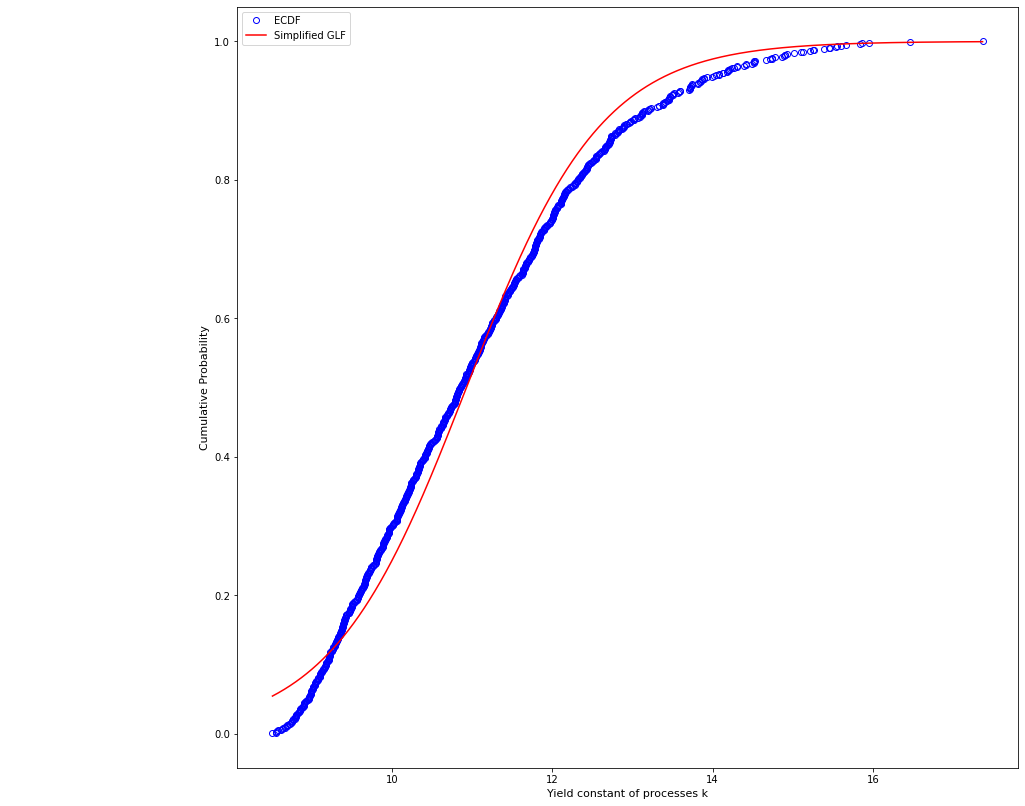

In [35]:
# define the true objective function
def objective(x, b2, b3, b4):
    return 1/((1+b2*(np.exp(-b3*(x-15))))**(1/b4))
#    return ((1+b2*(np.exp(-b3*x)))**(1/b4))**(-1)


popt, pcov = curve_fit(objective, xef, yef, maxfev = 10000)            
print(popt)
              
# summarize the parameter values
b2, b3, b4 = popt
x_line = np.arange(min(xef), max(xef),0.001)
# calculate the output for the range
y_line = objective(x_line, b2, b3, b4)
# create a line plot for the mapping function
plt.xlabel('Yield constant of processes k', size = 11)
plt.ylabel('Cumulative Probability', size = 11)
plt.plot(xe, ye, 'o',markerfacecolor='none',
                           markerfacecoloralt='lightsteelblue',
                           markeredgecolor='b', lw = 0.2, label="ECDF")
plt.plot(x_line, y_line, color='red', label="Simplified GLF")
plt.legend(loc='upper left', frameon=True)
plt.annotate('β2 = %.4e'% b2,(5.2,0.75))
plt.annotate('β3 = %0.3f'% b3,(5.2,0.65))
plt.annotate('β4 = %0.3f'% b4,(5.2,0.55))
plt.show()

In [ ]:
########################
### Kmeans Clustering
########################

In [26]:
# Using scikit-learn to perform K-Means clustering
from sklearn.cluster import KMeans


In [27]:
# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=5, random_state=0).fit(pv)

In [28]:
# Get the cluster labels
print(kmeans.labels_)

[3 1 0 1 2 1 3 1 1 4 0 3 0 3 4 2 2 3 0 1 3 1 4 1 4 3 3 0 0 2 0 0 0 0 3 1 3
 3 2 0 0 3 4 0 0 2 4 0 2 3 3 0 3 3 3 0 1 1 3 3 0 4 1 4 0 2 0 0 4 0 0 0 1 3
 0 0 0 3 0 3 4 2 0 2 3 4 3 0 3 3 1 3 3 4 4 1 2 4 1 2 3 1 0 1 3 3 4 1 1 0 4
 4 1 3 3 1 2 1 0 2 1 2 0 4 3 4 0 4 0 4 3 3 4 3 3 3 1 0 3 0 0 4 1 3 3 0 3 3
 1 0 2 0 1 0 1 4 1 1 3 0 1 0 3 0 3 3 3 1 0 1 3 3 1 0 4 1 4 3 0 1 1 4 0 0 1
 4 3 3 1 2 2 4 2 2 2 0 2 0 1 3 0 1 4 1 0 1 3 3 3 1 0 3 0 4 1 3 0 4 3 4 3 3
 0 2 1 1 1 3 3 3 1 1 4 3 1 4 4 4 3 4 3 4 3 0 1 3 0 2 1 0 0 0 3 4 0 4 4 1 4
 0 1 0 2 0 1 1 3 3 3 4 4 2 3 1 4 3 4 3 3 1 4 0 4 1 1 3 1 0 3 4 3 0 1 1 2 4
 0 4 0 4 4 3 4 0 0 2 0 4 3 3 3 3 1 2 3 3 3 0 1 3 0 1 1 4 1 4 1 1 1 2 4 3 4
 3 0 0 3 4 3 2 0 4 1 3 0 1 0 3 0 4 2 1 4 2 2 4 1 3 4 0 3 0 0 0 3 2 0 3 3 3
 0 3 0 3 3 1 3 1 2 1 0 3 3 0 3 0 4 3 1 1 3 3 1 1 3 2 0 4 4 0 3 3 3 2 3 3 3
 1 0 3 0 0 1 0 3 4 3 4 0 3 3 0 0 3 2 0 1 0 3 1 4 0 4 0 4 0 3 0 1 1 4 2 4 3
 1 3 3 3 1 4 3 2 0 3 3 3 4 2 4 4 3 2 0 0 1 0 0 0 1 1 1 1 4 0 2 4 0 4 0 3 4
 2 3 3 2 4 3 4 0 0 4 3 3 

In [29]:
print(kmeans.cluster_centers_)

[[17.42021614  9.83955726]
 [15.22732911  9.69422344]
 [16.50829032 14.04886545]
 [16.41950335 11.73257006]
 [13.13182786 11.2498701 ]]


In [30]:
#pe = pd.DataFrame(xe,pp)

nc = 5

# Specify the number of clusters (3) and fit the data X
kmeans2 = KMeans(n_clusters=nc, n_init = 100, random_state=0, algorithm = 'full').fit(pv)

# Get the cluster labels
print(kmeans2.labels_)

[2 4 1 4 3 4 2 4 4 0 1 2 1 2 0 3 3 2 1 4 2 4 0 4 0 2 2 1 1 3 1 1 1 1 2 4 2
 2 3 1 1 2 0 1 1 3 0 1 3 2 2 1 2 2 2 1 4 4 2 2 1 0 4 0 1 3 1 1 0 1 1 1 4 2
 1 1 1 2 1 2 0 3 1 3 2 0 2 1 2 2 4 2 2 0 0 4 3 0 4 3 2 4 1 4 2 2 0 4 4 1 0
 0 4 2 2 4 3 4 1 3 4 3 1 0 2 0 1 0 1 0 2 2 0 2 2 2 4 1 2 1 1 0 4 2 2 1 2 2
 4 1 3 1 4 1 4 0 4 4 2 1 4 1 2 1 2 2 2 4 1 4 2 2 4 1 0 4 0 2 1 4 4 0 1 1 4
 0 2 2 4 3 3 0 3 3 3 1 3 1 4 2 1 4 0 4 1 4 2 2 2 4 1 2 1 0 4 2 1 0 2 0 2 2
 1 3 4 4 4 2 2 2 4 4 0 2 4 0 0 0 2 0 2 0 2 1 4 2 1 3 4 1 1 1 2 0 1 0 0 4 0
 1 4 1 3 1 4 4 2 2 2 0 0 3 2 4 0 2 0 2 2 4 0 1 0 4 4 2 4 1 2 0 2 1 4 4 3 0
 1 0 1 0 0 2 0 1 1 3 1 0 2 2 2 2 4 3 3 2 2 1 4 2 1 4 4 0 4 0 4 4 4 3 0 2 0
 2 1 1 2 0 2 3 1 0 4 2 1 4 1 2 1 0 3 4 0 3 3 0 4 2 0 1 2 1 1 1 2 3 1 2 2 2
 1 2 1 2 2 4 2 4 3 4 1 2 2 1 2 1 0 2 4 4 2 2 4 4 2 3 1 0 0 1 2 2 2 3 2 2 2
 4 1 2 1 1 4 1 2 0 2 0 1 2 2 1 1 2 3 1 4 1 2 4 0 1 0 1 0 1 2 1 4 4 0 3 0 2
 4 2 2 2 4 0 2 3 1 2 2 2 0 3 0 0 2 3 1 1 4 1 1 1 4 4 4 4 0 1 3 0 1 0 1 2 0
 3 3 2 3 0 2 0 1 1 0 2 2 

In [31]:
clustering_labels_final = pd.DataFrame(kmeans.labels_)

filepath = r'clustering_labels.xlsx'

clustering_labels_final.to_excel(filepath, index=False)